In [1]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from ulbc import *
from flowstar import *
from ulbc.bondcalculus import *

In [2]:
R.<x1,x2,x3,x4,x5,x6,x7,x8,x9> = RIF[]

In [3]:
y = vector([
    10*x3 - RIF('0.1')*x1*x6,
    100*x4 - x1*x2,
    RIF('0.1')*x1*x6 - 50*x3,
    x2*x6 - 100*x4,
    5*x3 + RIF('0.5')*x1 - 10*x5,
    50*x5 + 50*x3 + 100*x4 - x6*(RIF('0.1')*x1 + x2 + 2*x8 + 1),
    50*x4 + RIF('0.01')*x2 - RIF('0.5')*x7,
    RIF('0.5')*x7 - 2*x6*x8 + x9 - RIF('0.2')*x8,
    2*x6*x8 - x9,
])

In [4]:
y

(-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9)

In [5]:
table([[yi] for yi in y])

""
""
""
""
""
""
""
""
""


In [6]:
y0 = [
    RIF('[0.98, 1.02]'),
    RIF('[1.28, 1.32]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'), # x4
    RIF('[0.08, 0.12]'),
    RIF('[1.28, 1.32]'), # x6
    RIF('[2.48, 2.52]'),
    RIF('[0.58, 0.62]'),
    RIF('[1.28, 1.32]'),
]

In [7]:
table([y0i.endpoints() for y0i in y0])

,
,
,
,
,
,
,
,
,


In [8]:
R

Multivariate Polynomial Ring in x1, x2, x3, x4, x5, x6, x7, x8, x9 over Real Interval Field with 53 bits of precision

In [9]:
sys = System(R, R.gens(), y0, y); sys

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [10]:
RReal = RR['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

In [11]:
RReal(sys.y[2])

0.100000000000000*x1*x6 - 50.0000000000000*x3

In [12]:
sys_real = System(
    RReal,
    RReal.gens(),
    [y0i.center() for y0i in sys.y0],
    [RReal(yi) for yi in sys.y],
)
sys_real

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [1, [1.2999999999999998 .. 1.2999999999999999], [0.10000000000000000 .. 0.10000000000000001], [0.10000000000000000 .. 0.10000000000000001], [0.10000000000000000 .. 0.10000000000000001], [1.2999999999999998 .. 1.2999999999999999], [2.5000000000000000 .. 2.5000000000000000], [0.60000000000000008 .. 0.60000000000000009], [1.2999999999999998 .. 1.2999999999999999]], (-0.100000000000000*x1*x6 + 10.0000000000000*x3, -x1*x2 + 100.000000000000*x4, 0.100000000000000*x1*x6 - 50.0000000000000*x3, x2*x6 - 100.000000000000*x4, 0.500000000000000*x1 + 5.00000000000000*x3 - 10.0000000000000*x5, -0.100000000000000*x1*x6 - x2*x6 - 2.00000000000000*x6*x8 + 50.0000000000000*x3 + 100.000000000000*x4 + 50.0000000000000*x5 - x6, 0.0100000000000000*x2 + 50.0000000000000*x4 - 0.500000000000000*x7, -2.00000000000000*x6*x8 + 0.500000000000000*x7 - 0.200000000000000*x8 + x9, 2.00000000000000*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [13]:
y0_real = [y0i.center() for y0i in sys.y0]
table([[y0i] for y0i in y0_real])

""
""
""
""
""
""
""
""
""


In [14]:
timepoints = srange(0,10,0.1)

In [15]:
sln = desolve_odeint(sys_real.y, y0_real, timepoints, list(sys_real.x))

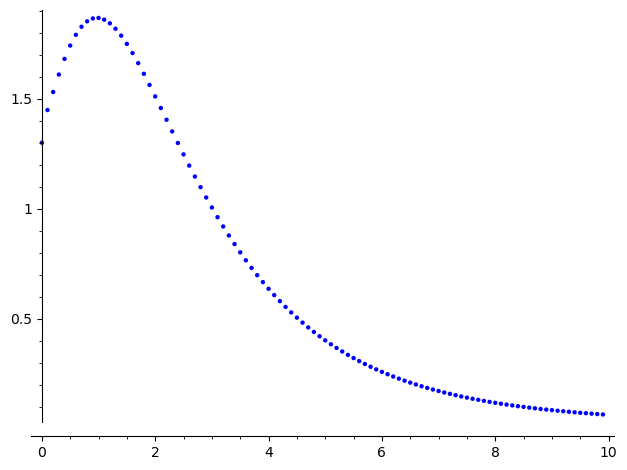

In [16]:
points(zip(timepoints, [yi[1] for yi in sln]))

In [17]:
from scipy.integrate import solve_ivp
from ulbc.matricies import vec_to_numpy, mat_to_numpy, convert_vec, sympy_gens

In [18]:
f = vec_to_numpy(RReal, sys_real.y)
jac = mat_to_numpy(RReal, sage.jacobian(sys_real.y, sys_real.x))

In [19]:
sln = solve_ivp(f,
                (0, 10),
                y0_real,
                method='LSODA',
                jac=jac,
                vectorized=True,
                dense_output=True)

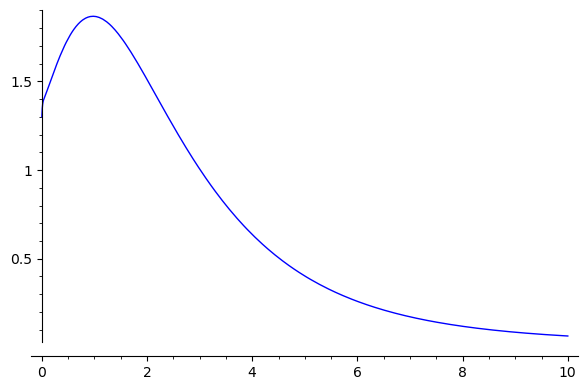

In [20]:
plot(lambda t: sln.sol(t)[1], (0, 10))

In [21]:
reach = sys.reach(
    5, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=100,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6)

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7


var_id_x = 3
var_id_y = 5


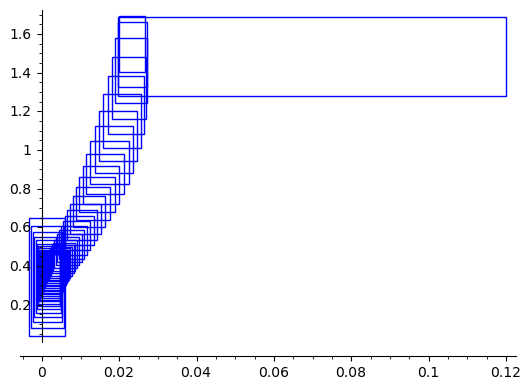

In [25]:
p = reach.sage_interval_plot("x4", "x6")
p.set_aspect_ratio(1/20)
p

In [ ]:
#reach.wplot("x4", "x6")

In [26]:
def test_monitoring(prop, duration, **kwargs):
    t0 = time.time()
    sig = prop.signal_for_system(sys,
    duration, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=100,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    **kwargs)
    t1 = time.time()
    print(f"Run done in {t1 - t0} sec\noptions: {repr(kwargs)}")
    return t1 - t0, sig

# Optimizing and speedup

## Unoptimized

In [22]:
P = Atomic(var("x6") > 1.4); P

Atomic(x6 > 1.40000000000000)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
inte

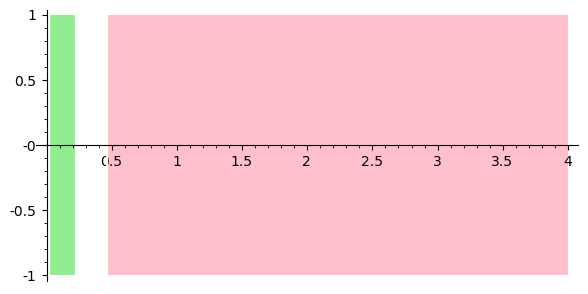

In [23]:
test_monitoring(P, 4, use_masks=False, symbolic_composition=True)[1].plot()

In [24]:
Q = Atomic(var("x6") < 1); Q

Atomic(x6 < 1)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
inte

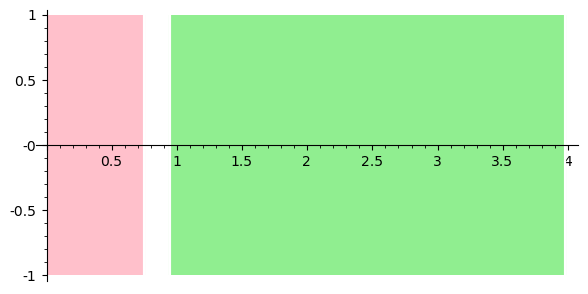

In [25]:
test_monitoring(Q, 4, use_masks=False, symbolic_composition=True)[1].plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
inte

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


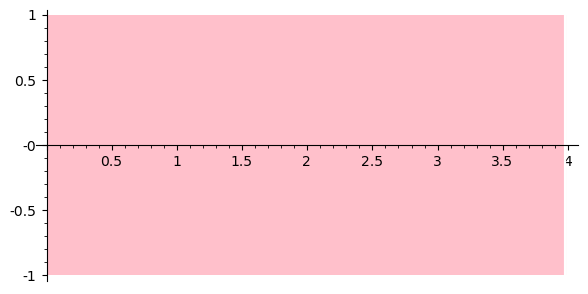

In [26]:
sigPQ = test_monitoring(P & Q, 4, use_masks=False, symbolic_composition=True)[1]
sigPQ.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
inte

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


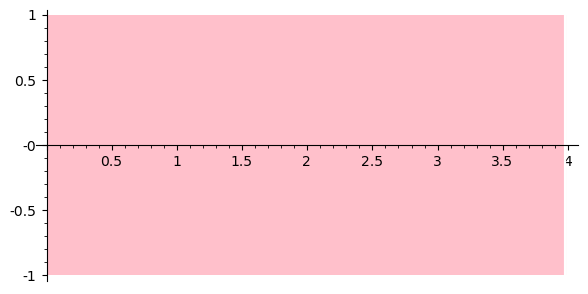

In [27]:
sigPQ = test_monitoring(P & Q, 4, use_masks=True, symbolic_composition=True)[1]
sigPQ.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
inte

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


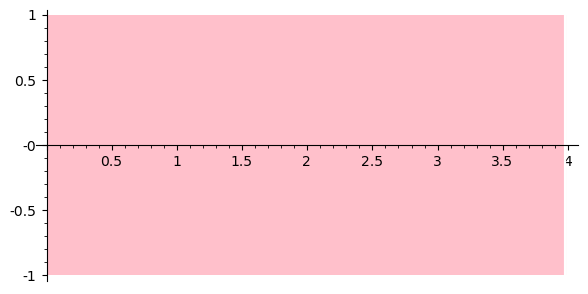

In [28]:
sigPQ = test_monitoring(P & Q, 4, use_masks=True, two_phase_masks=True, symbolic_composition=True)[1]
sigPQ.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
inte

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


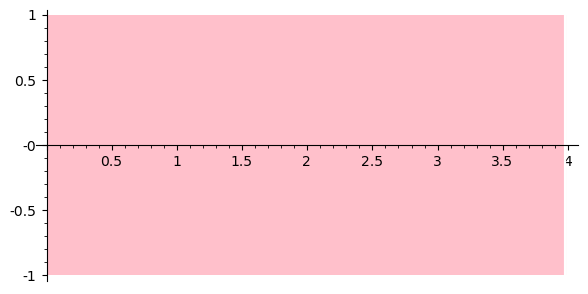

In [29]:
sigPQ = test_monitoring(P & Q, 4, use_masks=True, two_phase_masks=False, symbolic_composition=False)[1]
sigPQ.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
inte

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


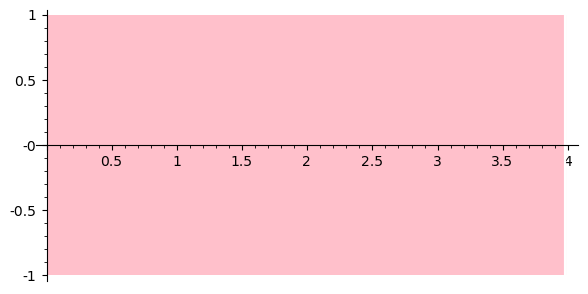

In [31]:
sigPQ = test_monitoring(P & Q, 4, use_masks=True, two_phase_masks=True, symbolic_composition=False)[1]
sigPQ.plot()

In [ ]:
R = Atomic((var("x5") - 0.04)^2 + var("x3")^2 < 0.001)

In [ ]:
test_monitoring(R, 4)[1].plot()

In [ ]:
sigPQ = test_monitoring(P & R & Q, 4, use_masks=True, two_phase_masks=True, symbolic_composition=True)[1]
sigPQ.plot()

##  Optimized

In [105]:
%%time
r = sys.reach(
    4, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=100,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    symbolic_composition=True
)

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
CPU times: user 1min 59s, sys

In [106]:
r.num_flowpipes

1334

In [107]:
%%time
sigPc = P.signal(r, crude_roots=True, skip_unpreconditioning=True, symbolic_composition=False)
sigPc.plot()

PolyObserver(x6 - 1.4000000000000000?, <flowstar.reachability.Reach object at 0x7f20a4cd2320>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 7.36 seconds
roots = [[0.0048028783727901138 .. 0.020435765977123051], [0.20345478283219919 .. 0.48300000000000043]]
domain = [0.0000000000000000 .. 3.9990000000000002]
roots = [[0.0048028783727901138 .. 0.020435765977123051], 
 [0.20345478283219919 .. 0.48300000000000043]]
seg_domain = [0.0000000000000000 .. 3.9990000000000002]
roots = [[0.0048028783727901138 .. 0.020435765977123051], 
 [0.20345478283219919 .. 0.48300000000000043]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
run

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


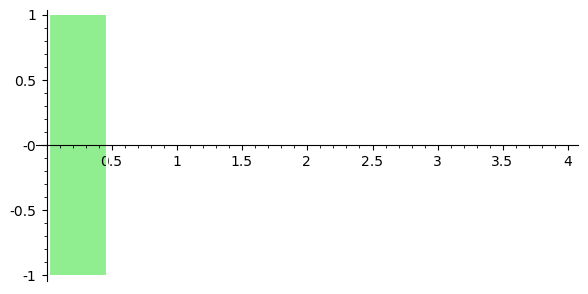

In [108]:
sigPc.to_mask_and().plot()

In [109]:
%%time
sigQ = Q.signal(r, symbolic_composition=True, mask=sigPc.to_mask_and())
sigQ.plot()

PolyObserver(-x6 + 1, <flowstar.reachability.Reach object at 0x7f20a4cd2320>, 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6 symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 3.9990000000000002], [[0.0048028783727901138 .. 0.48300000000000043]]))
fprime = 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6
symbolic_composition=True, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.31 seconds
roots = []
domain = [0.0000000000000000 .. 3.9989999999999997]
roots = []
seg_domain = [0.0048028783727901138 .. 0.48300000000000043]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
CPU times: user 401 ms, sys: 17 µs, total: 401 ms
Wall time: 400 ms


/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


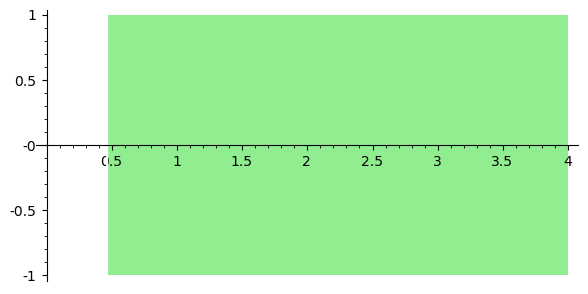

In [110]:
sigQ.with_mask(true_mask(RIF(0, 4))).to_mask_and().plot()

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


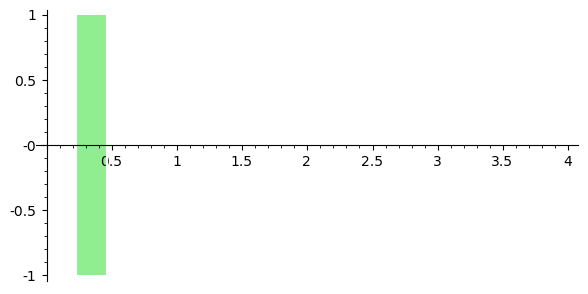

In [111]:
maskPu = sigPc.to_mask_and() & sigPc.to_mask_or()
maskPu.plot()

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


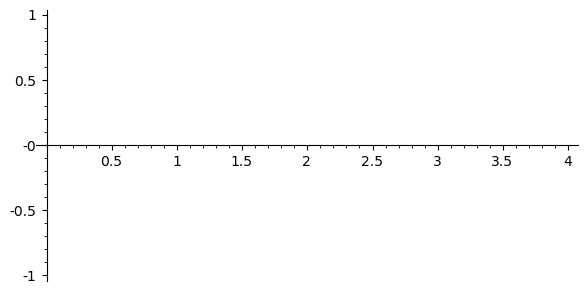

In [112]:
maskPr = sigQ.with_mask(true_mask(RIF(0, 4))).to_mask_and() & maskPu
maskPr.plot()

In [113]:
%time
sigPr = P.signal(r, mask=maskPr, symbolic_composition=True)

CPU times: user 5 µs, sys: -0 ns, total: 5 µs
Wall time: 8.34 µs
PolyObserver(x6 - 1.4000000000000000?, <flowstar.reachability.Reach object at 0x7f20a4cd2320>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6 symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 3.9989999999999997], [[0.0048028783727901138 .. 0.0048028783727901139], [0.48300000000000042 .. 0.48300000000000043]]))
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=True, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = []
domain = [0.0000000000000000 .. 3.9989999999999997]
roots = []
seg_domain = [0.0048028783727901138 .. 0.0048028783727901139]
roots = []
running f_bool: 1 items in 0.00 seconds
seg_domain = [0.48300000000000042 .. 0.48300000000000043]
roots = []
running f_bool: 1 items in 0.00 seconds
signal

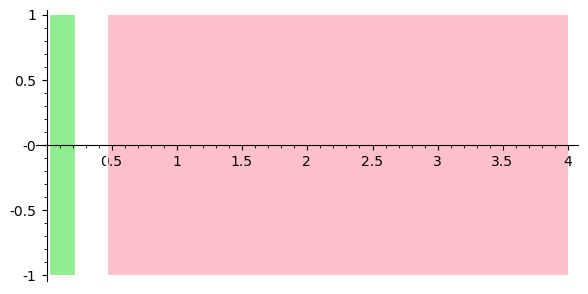

In [114]:
sigPc.plot()

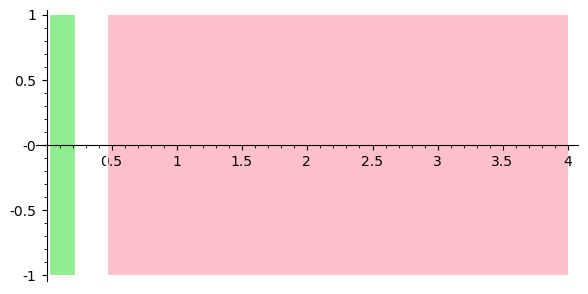

In [117]:
sigPc.union(sigPr).plot()

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


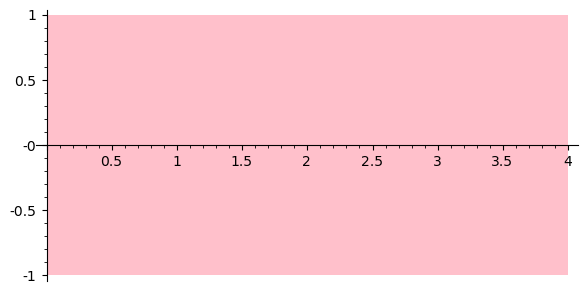

In [118]:
sig = sigPc.union(sigPr) & sigQ.with_mask(true_mask(RIF(0, 4)))
sig.plot()